Perkenalan:
1. Nama: Muhammad Zukri Al Walidani
2. Batch: 007
3. Phase: 1

Data berikut merupakan kumpulan informasi dari karyawan perusahaan selama waktu tertentu. Selama waktu tersebut karyawan perusahaan ada yang bertahan dan ada juga yang keluar. Keluarnya karyawan tersebut cukup merugikan perusahaan karena harus melakukan rekrutmen, Belum lagi jika karyawan yang keluar tersbut merupakan karyawan dengan kinerja yang bagus. Untuk itu dibutuhkan analisis faktor apa saja yang signifikan dalam mempengaruhi karyawan dan perlu dibentuk model untuk memprediksi karyawan yang bertahan atau keluar dari perusahaan. Analisis ini diperlukan untuk mengevaluasi lingkungan perusahaan, manajemen sumberdaya manusia perusahaan dan optimalisasi kinerja karyawan.

Import pustaka

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [153]:
df=pd.read_csv('Employee.csv')

In [154]:
#melihat data
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [155]:
df.LeaveOrNot.unique()

array([0, 1], dtype=int64)

In [156]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Exploratory Data Analisis

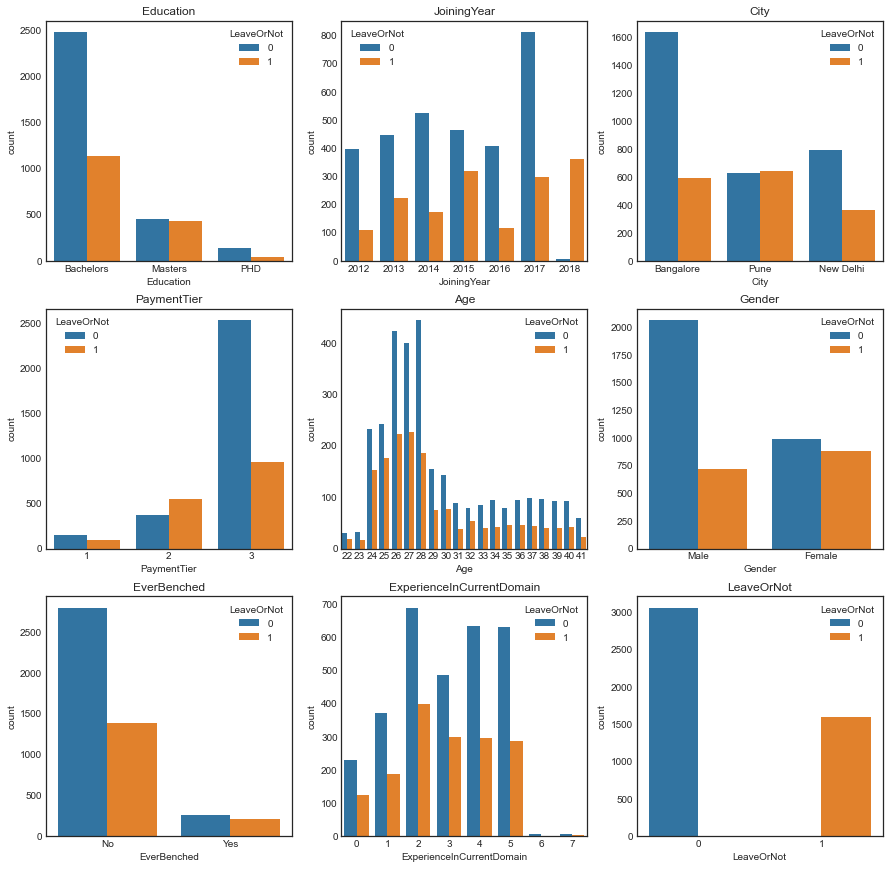

In [158]:
x_col = df.columns
num=0
plt.figure(figsize=(15, 15))
for i in x_col:
    
    num += 1
    plt.subplot(3, 3, num)
    sns.countplot(data=df, x=i, hue='LeaveOrNot').set_title(i)
    

plt.show()

insight:
1. Yang paling berpeluang meniggalkan perusahaan adalah yang berpendidikan Masters
2. Tahun 2012 meupakan tahun dengan perbandingan karyawan keluar dan bertahan yang paling kecil.
3. Tahun 2018 terjadi lonjakan besar karyawan yang keluar dari perusahaan.
4. Karyawan dari kota Pune paling berpotensi meninggal perusahaan.
5. Payment Tier pada ketegori 2 banyak yang meninggalkan perusahaan, sementara Payment Tier level 3 tidak banyak yang keluar.
6. Jumlah Karyawan didominasi dari umur 24 tahun hingga 29 tahun.
7. Wanita cenderung meninggalkan perusahaan
8. Karyawan yang tidak mengerjakan proyek berkemungkinan besar resign dari perusahaan.
9. Kebanyakan karyawan berpengalaman selama 2 tahun dalam pekerjaan sebelumnya.
10. Karyawan yang tinggal masih lebih banyak dari yang keluar.

<AxesSubplot:>

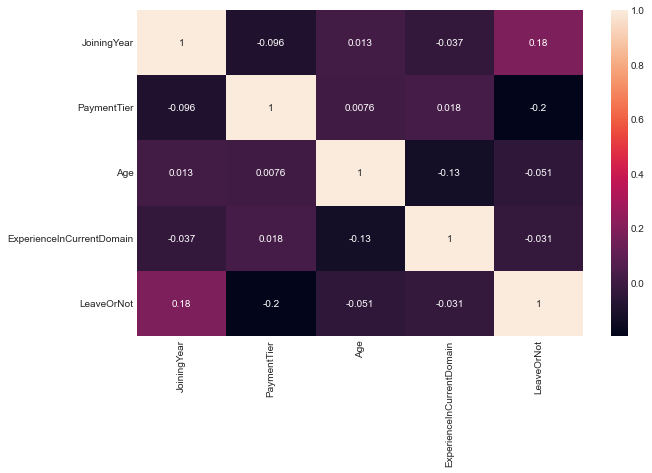

In [159]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Insight:
1. Varibel berkorelasi secara signifikan terhadap dirinya sendiri.
2. varibel yang memiliki korelasi paling tinggi dengan keluar atau tidaknya karyawan adalah paymentTier dan joinnig year
3. varibel yang saling berkorelasi tertinggi yaitu ExpreiencecurruntDomain dan age

Feature Engineering

In [160]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [161]:
#melihat missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [162]:
#melihat missing value
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Text(0.5, 1.0, 'ExperienceInCurrentDomain')

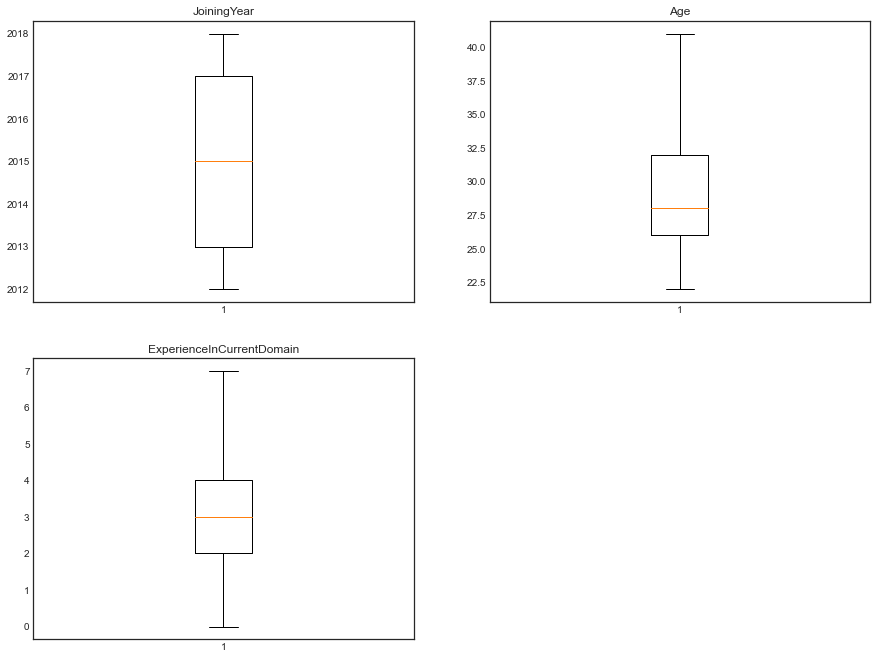

In [163]:
#melihat Outliers
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['JoiningYear'])
ax.set_title('JoiningYear')
ax=plt.subplot(522)
plt.boxplot(df['Age'])
ax.set_title('Age')
ax=plt.subplot(523)
plt.boxplot(df['ExperienceInCurrentDomain'])
ax.set_title('ExperienceInCurrentDomain')

In [164]:
df.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [251]:
from sklearn.preprocessing import OrdinalEncoder

In [253]:
encoder = OrdinalEncoder(dtype=np.int64)

X = df.drop("LeaveOrNot",axis=1)
y = df["LeaveOrNot"]

X[X.columns.to_list()] = encoder.fit_transform(X)
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,5,0,2,12,1,0,0
1,0,1,2,0,6,0,0,3
2,0,2,1,2,16,0,0,2
3,1,4,0,2,5,1,0,5
4,1,5,2,2,2,1,1,2


In [315]:
X.Age.unique()

array([12,  6, 16,  5,  2,  0,  1, 15, 10, 17,  7,  8, 14,  9,  3,  4, 18,
       13, 11, 19], dtype=int64)

In [314]:
X.JoiningYear.unique()

array([5, 1, 2, 4, 3, 0, 6], dtype=int64)

In [313]:
X.Education.unique()

array([0, 1, 2], dtype=int64)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [298]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [257]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

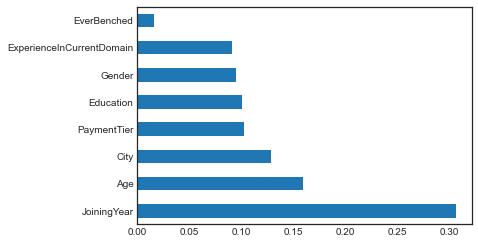

In [258]:
#menentukan feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

insight:
1. Fitur yang paling berpengaruh adalah joining Year, age dan city

Modeling dan Model Evaluation

In [305]:
#model Logisctic Regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
logmodel = LogisticRegression() 
logmodel.fit(X_train_scaled,y_train)
y_pred_train_logmodel = logmodel.predict(X_train)
y_pred_test_logmodel = logmodel.predict(X_test)


print(confusion_matrix(y_test, y_pred_test_logmodel))
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_logmodel))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_logmodel))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_logmodel))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_logmodel))
print('Precision Score Train:', precision_score (y_train, y_pred_train_logmodel))
print('Precision Score Test:', precision_score (y_test, y_pred_test_logmodel))
print('F-1Score:',f1_score(y_test, y_pred_test_logmodel))

[[647  81]
 [314 122]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       728
           1       0.60      0.28      0.38       436

    accuracy                           0.66      1164
   macro avg       0.64      0.58      0.57      1164
weighted avg       0.65      0.66      0.62      1164

ROC AUC: 0.5842763887488658
Accuracy Score Train: 0.6884494124390943
Accuracy Score Test: 0.6606529209621993
Precision Score Train: 0.5771543086172345
Precision Score Test: 0.6009852216748769
F-1Score: 0.38184663536776214


In [306]:
#model KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_knn))
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_knn))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_knn))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_knn))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_knn))
print('Precision Score Train:', precision_score (y_train, y_pred_train_knn))
print('Precision Score Test:', precision_score (y_test, y_pred_test_knn))
print('F-1Score:',f1_score(y_test, y_pred_test_knn))

[[702  26]
 [264 172]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       728
           1       0.87      0.39      0.54       436

    accuracy                           0.75      1164
   macro avg       0.80      0.68      0.69      1164
weighted avg       0.78      0.75      0.72      1164

ROC AUC: 0.6793905635648755
Accuracy Score Train: 0.7847520779593007
Accuracy Score Test: 0.7508591065292096
Precision Score Train: 0.8680926916221033
Precision Score Test: 0.8686868686868687
F-1Score: 0.5425867507886436


In [307]:
#model SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_svc))
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_svc))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_svc))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_svc))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_svc))
print('Precision Score Train:', precision_score (y_train, y_pred_train_svc))
print('Precision Score Test:', precision_score (y_test, y_pred_test_svc))
print('F-1Score:',f1_score(y_test, y_pred_test_svc))

[[496 232]
 [304 132]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       728
           1       0.36      0.30      0.33       436

    accuracy                           0.54      1164
   macro avg       0.49      0.49      0.49      1164
weighted avg       0.52      0.54      0.53      1164

ROC AUC: 0.4920354874483315
Accuracy Score Train: 0.586127830323875
Accuracy Score Test: 0.5395189003436426
Precision Score Train: 0.37318840579710144
Precision Score Test: 0.3626373626373626
F-1Score: 0.33


In [308]:
#model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
y_pred_train_dtree = dtree.predict(X_train)
y_pred_test_dtree = dtree.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_dtree))
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_dtree))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_dtree))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_dtree))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_dtree))
print('Precision Score Train:', precision_score (y_train, y_pred_train_dtree))
print('Precision Score Test:', precision_score (y_test, y_pred_test_dtree))
print('F-1Score:',f1_score(y_test, y_pred_test_dtree))

[[645  83]
 [138 298]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       728
           1       0.78      0.68      0.73       436

    accuracy                           0.81      1164
   macro avg       0.80      0.78      0.79      1164
weighted avg       0.81      0.81      0.81      1164

ROC AUC: 0.7847376247605605
Accuracy Score Train: 0.9329320722269991
Accuracy Score Test: 0.8101374570446735
Precision Score Train: 0.9783950617283951
Precision Score Test: 0.7821522309711286
F-1Score: 0.7294981640146878


In [309]:
#model Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_rfc ))
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_rfc))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_rfc))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_rfc))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_rfc))
print('Precision Score Train:', precision_score (y_train, y_pred_train_rfc))
print('Precision Score Test:', precision_score (y_test, y_pred_test_rfc))
print('F-1Score:',f1_score(y_test, y_pred_test_rfc))

[[663  65]
 [140 296]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       728
           1       0.82      0.68      0.74       436

    accuracy                           0.82      1164
   macro avg       0.82      0.79      0.80      1164
weighted avg       0.82      0.82      0.82      1164

ROC AUC: 0.7948066841415465
Accuracy Score Train: 0.9329320722269991
Accuracy Score Test: 0.8238831615120275
Precision Score Train: 0.9514563106796117
Precision Score Test: 0.8199445983379502
F-1Score: 0.7427854454203263


In [310]:
#model Gausian NB Classifier
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
y_pred_train_gaussiannbp = gaussiannb.predict(X_train)
y_pred_test_gaussiannbp = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_gaussiannbp ))
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_gaussiannbp))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_gaussiannbp))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_gaussiannbp))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_gaussiannbp))
print('Precision Score Train:', precision_score (y_train, y_pred_train_gaussiannbp))
print('Precision Score Test:', precision_score (y_test, y_pred_test_gaussiannbp))
print('F-1Score:',f1_score(y_test, y_pred_test_gaussiannbp))

[[589 139]
 [237 199]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       728
           1       0.59      0.46      0.51       436

    accuracy                           0.68      1164
   macro avg       0.65      0.63      0.64      1164
weighted avg       0.67      0.68      0.67      1164

ROC AUC: 0.632743976207279
Accuracy Score Train: 0.6904557179707652
Accuracy Score Test: 0.6769759450171822
Precision Score Train: 0.5451612903225806
Precision Score Test: 0.5887573964497042
F-1Score: 0.5142118863049095


In [265]:
#model GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred_train_gbk = gbk.predict(X_train)
y_pred_test_gbk = gbk.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_gbk ))
print(round(accuracy_score(y_test, y_pred_test_gbk),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_gbk))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_gbk))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_gbk))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_gbk))
print('Precision Score Train:', precision_score (y_train, y_pred_train_gbk))
print('Precision Score Test:', precision_score (y_test, y_pred_test_gbk))
print('F-1Score:',f1_score(y_test, y_pred_test_gbk))

[[689  39]
 [151 285]]
84.0
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       728
           1       0.88      0.65      0.75       436

    accuracy                           0.84      1164
   macro avg       0.85      0.80      0.81      1164
weighted avg       0.84      0.84      0.83      1164

ROC AUC: 0.8000491480996068
Accuracy Score Train: 0.8535396961880195
Accuracy Score Test: 0.8367697594501718
Precision Score Train: 0.893848009650181
Precision Score Test: 0.8796296296296297
F-1Score: 0.7500000000000001


In [266]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,Gradient Boosting,0.843512
0,Random Forest Classifier,0.828895
1,Decision Tree Classifier,0.804532
3,K-Near Neighbors,0.764982
4,Logistic Model,0.710519
5,Gausian NB,0.688446
2,Support Vector Machine,0.594722


Terlihat bahwa model yang memiliki nilai terbaik adalah Gradient Boosting, random forest classifier dan Decision Tree.

In [267]:
random_state=11
n_jobs = -1
# GardienBoostingClassifier
pipe_gbc = Pipeline([('gbc', GradientBoostingClassifier(random_state=None, max_features=None))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='auto'))])

In [268]:
#menentukan parameters untuk Grid Search untuk model terbaik

cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state)
# GradienBoositing
grid_params_gbc = [{
                'gbc__n_estimators': [100],
                'gbc__min_weight_fraction_leaf': [0],
                'gbc__max_depth': [3]
                }]
# RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [80, 100],
                'rf__max_depth': [25, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [60, 70]
                }]
# DecisionTreeClassifier
grid_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]


In [269]:
#Mencari Grid Search
#GradienBoostingRegression
gs_gbc = GridSearchCV(pipe_gbc, param_grid=grid_params_gbc,
                     scoring='accuracy', cv=cv) 
#RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='accuracy', cv=cv)
#DecisionTree
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='accuracy', cv=cv)

In [270]:
# models yang ingin diiterasi
look_for = [gs_gbc, gs_rf, gs_dt]
# dict for later use 
model_dict = {0:'Gradien Boosting', 1:'RandomForest', 2:'DecisionTree'}

In [271]:
#iterasi model dan hasil
result_acc = {}
result_auc = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start Model ++++++++++++++++++++++')
        print('Estimator  {}'.format(model_dict[index]))
        model.fit(X_train, y_train)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score  {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(X_test, y_test)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start Model ++++++++++++++++++++++
Estimator  Gradien Boosting
---------------------------------------------
best params {'gbc__max_depth': 3, 'gbc__min_weight_fraction_leaf': 0, 'gbc__n_estimators': 100}
best score  0.8437980209904914
---------------------------------------------
ROC_AUC is 0.8780796325234399 and accuracy rate is 0.8367697594501718
It lasted for 1.579 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start Model ++++++++++++++++++++++
Estimator  RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 70}
best score  0.8002289797042585
---------------------------------------------
ROC_AUC is 0.8528045921967942 and accuracy rate is 0.7878006872852233
It lasted for 22.988 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start Model ++++++++++++++++++++++
Estimator  DecisionTree
---------------------

Model Improvement

In [272]:
best_gbk_clf = GradientBoostingClassifier(max_depth=3, min_weight_fraction_leaf=0, n_estimators=100)
best_gbk_clf.fit(X_train, y_train)


GradientBoostingClassifier(min_weight_fraction_leaf=0)

In [273]:
y_pred_train_best_gbk = best_gbk_clf.predict(X_train)
y_pred_test_best_gbk = best_gbk_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_best_gbk ))
print(round(accuracy_score(y_test, y_pred_test_best_gbk),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test, y_pred_test_best_gbk))
print('ROC AUC:',roc_auc_score(y_test, y_pred_test_best_gbk))
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_best_gbk))
print('Accuracy Score Test:', accuracy_score(y_test, y_pred_test_best_gbk))
print('Precision Score Train:', precision_score (y_train, y_pred_train_best_gbk))
print('Precision Score Test:', precision_score (y_test, y_pred_test_best_gbk))
print('F-1Score:',f1_score(y_test, y_pred_test_best_gbk))

[[689  39]
 [151 285]]
84.0
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       728
           1       0.88      0.65      0.75       436

    accuracy                           0.84      1164
   macro avg       0.85      0.80      0.81      1164
weighted avg       0.84      0.84      0.83      1164

ROC AUC: 0.8000491480996068
Accuracy Score Train: 0.8535396961880195
Accuracy Score Test: 0.8367697594501718
Precision Score Train: 0.893848009650181
Precision Score Test: 0.8796296296296297
F-1Score: 0.7500000000000001


Model Analisis:
1. Dari 6 model yang dilakukan, Gradien Boosting Classifier merupakan model yang paling cocok dengan data ini karena memiliki Acurray yang paling baik dan tidak terjadi overfitting ataupun underfitting.
2. setiap model memiliki waktu yang berbeda dalam running, yang paling lama dalam data ini dalah random foret clasifier dalam waktu 10.9 detik.
3. Dalam model Improvement ditemukan bahwa paramete terbaik untuk GradienBoosting classifier adalah max_depth=3, min_weight_fraction_leaf=0, n_estimators=100
4. Tidak terdapat perbedaan nilai antara base mmodel dan model improvement

Model Inference

In [274]:
#membuat data baru
X_ex= np.random.randint(10, size=(128292,8))

In [275]:
#logisticregression
y_pred = logmodel.predict(X_ex)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [276]:
#Knearneigboarn
y_predknn = knn.predict(X_ex)
y_predknn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [277]:
#SVC
y_predsvc = svc.predict(X_ex)
y_predsvc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [278]:
#Decisiontree
y_preddtree = dtree.predict(X_ex)
y_preddtree

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [279]:
#randomforestclassifier
y_predrfc = rfc.predict(X_ex)
y_predrfc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [280]:
#gausianNB
y_predgaussiannb = gaussiannb.predict(X_ex)
y_predgaussiannb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [281]:
y_predgaussiannb = gaussiannb.predict(X_ex)
y_predgaussiannb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [282]:
#gradienBoosting
y_predgbk = gbk.predict(X_ex)
y_predgbk

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

Kesimpulan:
1. Tahun 2018 terjadi lonjakan besar karyawan yang keluar dari perusahaan.
2. Karyawan dari kota Pune paling berpotensi meninggal perusahaan dibandingkan dengan kota lain
3. Payment Tier pada ketegori 2 banyak yang meninggalkan perusahaan, sementara Payment Tier level 3 tidak banyak yang keluar. Hal ini terjadi karena Payment Tier level 3 memiliki jumlah yang lebih besar dari payment tier 2. Payment tier 2 walaupun lebih besar dari payment tier 1 bisa jadi memiliki jobdesk yang tidak sesuai dengan hasil yang didapat.
4. Wanita cenderung meninggalkan perusahaan bisa jadi dikarenakan tekanan yang besar.
5. Karyawan yang tidak mengerjakan proyek berkemungkinan besar resign dari perusahaan, penting bagi HR untuk melakukan follup karyawan agar tetap berkontribusi dalam proyek perusahaan.
6. Menghindari pelonjakan karyawan yang keluar kembali dapat dilakukan evaluasi terhadap layanan perusahaan kepada karyawan, memberikan pekerjaan yang sesuai dengan hasil yang didapatkan akan menjaga karyawan untuk tetap bertahan dan berkontribusi kepada perusahaan.
7. Permodelan yang cocok untuk data ini adalah model Gradien Boosting Clasifier dengan base line model dan improvement model mempunyai accuracy 0.84
8. Model mampu memprediksi data baru


In [283]:
import pickle
filename = open("scaler.pkl", "wb")
pickle.dump(scaler, filename)
filename.close()

In [284]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(best_gbk_clf, model_file)

In [292]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('encoder', OrdinalEncoder()),
                ('model', GradientBoostingClassifier())])

In [296]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('model', GradientBoostingClassifier())])

In [297]:
y_pred= pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       728
           1       0.88      0.65      0.75       436

    accuracy                           0.84      1164
   macro avg       0.85      0.80      0.81      1164
weighted avg       0.84      0.84      0.83      1164



In [311]:
with open("pipeline.pkl","wb") as pipe_model:
    pickle.dump(pipe, pipe_model)